# Data Analysis and prediction modeling for 'Kickstarter Project Success'
by Daniel Müller, Dominik Hohmsnn & Johannes Pfohl

What is this notebook about? About a data science project that bases on the Kickstarter Project Success dataset. We will have a look on the factors that have an impact and that have not an impact on success and failure of a Kickstarter project. Furhter we are modeling at least three prediction models to forecast if a project will be successful of not. 
Finally we will give a conclution and outlook for all people how are thinking about to launch a project on Kickstarter.

# Content

I. Column Names and descriptions for King County Data Set

II. Import required Packages and the Dataset

III. Data Understanding, Preparation and Munging<sup>1</sup>   
   - Data transforming
   - Data cleaning

IV. Exploratory Data Analysis
   - General view over the characteristics
   - Going one by one through the varaiables

V. Multiple Regression Model

VI. Modelling by using Sklearn

VII. Summary

...
<sup>1</sup> Data integraten, data transformation, data reduction, data cleaning

# I. Column Names and descriptions for 'Kickstarter Project Success'

| Column | Description | Dtype | None-Null | Nunique | Relevance |
| - | - | - | - | - | - |
| `backers_count` | The number of participants of the kickstarter project | int64 | 209222 | 3246 | - |
| `blurb` | Short description of the project by the project initiator. Max 135 characters. | object | 209214 | 180700 | - |
| `category` | Dictionary object. \n Contains `id, name, slug, position, parent_id, color, urls` | object | 209222 | 169 | yes |
| `converted_pledged_amount` | Open | int64 | 209222 | 31387 | - |
| `country` | Country of of Kickstarter account (?) | object | 209222 | 22 | yes |
| `created_at`| Creation date of the project. UNIX time format | int64| 209222 | 182158 | yes |
| `creator`| Dictionary of user details `id, name, is_registered, chosen_currency, ... | object | 209222 | 208562 | - |
| `currency`| Currency (3-digit code) by which the project is founded | object | 209222 | 14 | yes |
| `currency_symbol`| Symbol related to `currency` feature. | object | 209222 | 6 | - |
| `currency_trailing_code`| | bool | 209222 | 2 | - |
| `current_currency`| Open | object | 209222 | 5 | - |
| `deadline`| Deadline of the project. UNIX time format | int64 | 209222 | 170854 | yes |
| `disable_communication`| Is the communication with the creator allowed? | bool | 209222 | 2 | - |
| `friends`| 300 entries with empty list object | object | 300 | 1 | - |
| `fx_rate`| Open | float64 | 209222 | 67 | - |
| `goal`| Target amount | float64 | 209222 | 5110 | yes |
| `id`| Intern kickstarter id | int64 | 209222 | 182264 | - |
| `is_backing`| 300 instances of 'False' | object | 300 | 1 | - |
| `is_starrable`| Open | bool | 209222 | 2 | - |
| `is_starred`| Open | object | 300 | 2 | - |
| `launched_at`| Date of publication on kickstarter | int64 | 209222 | 182109 | yes |
| `location`| Dictionary of location details | object | 208996 | 15235 | yes |
| `name`| Project name. Limited to 60 chars. | object | 209222 | 181680 | - |
| `permissions`| 300 entries with empty list object | object | 300 | 1 | - |
| `photo`| Dictionary of photo url, ...  | object | 209222 | 182263 | - |
| `pledged`| Amount pledged by the participants in home currency | float64 | 209222 | 44386 | - |
| `profile`| .json of profile details | object | 209222 | 182265 | - |
| `slug`| Part of the URL. Corresponds to name | object | 209222 | 182264 | - |
| `source_url`| URL of the project category | object | 209222 | 169 | - |
| `spotlight`| Possibility for successfuk founders to share the implementation | bool | 209222 | 2 | - |
| `staff_pick`| Highlighted by staff ('projects we love') | bool | 209222 | 2 | yes |
| `state`| Status of the crowdfunding action | object | 209222 | 5 | target |
| `state_changed_at`| Time of the last status change. UNIX time format | int64 | 209222 | 172048 | - |
| `static_usd_rate`| Exchange Rate of the US Dollar | float64 | 209222 | 11195 | Yes |
| `urls`| .json of URL. Link to the project and donation | object | 209222 | 182554 | - |
| `usd_pledged`| Amount pledged by the participants in US Dollar | float64 | 209222 | 79234 | - |
| `usd_type` | Domestic or international use| object | 208472 | 2 | yes |

## II. Import required Packages and the Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import json
from datetime import datetime
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn')

sns.set(style="white", palette="muted",font_scale=1.5, rc={"lines.linewidth": 2.5,'figure.figsize':(20,9)})

In [2]:
df_full = pd.read_pickle("./data_frame_full_2021-03-12.pickle")

## III. Data Understanding, Preparation and Munging

In [3]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209222 entries, 0 to 209221
Columns: 108 entries, backers_count to category_parent_name
dtypes: bool(5), datetime64[ns](3), float64(18), int64(16), object(66)
memory usage: 165.4+ MB


In [4]:
df_small = pd.read_pickle("./data_frame_small_2021-03-12.pickle")

In [5]:
df_small.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209222 entries, 0 to 209221
Data columns (total 35 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   backers_count          209222 non-null  int64         
 1   blurb                  209214 non-null  object        
 2   country                209222 non-null  object        
 3   created_at             209222 non-null  int64         
 4   currency               209222 non-null  object        
 5   deadline               209222 non-null  int64         
 6   disable_communication  209222 non-null  bool          
 7   goal                   209222 non-null  float64       
 8   launched_at            209222 non-null  int64         
 9   name                   209222 non-null  object        
 10  staff_pick             209222 non-null  bool          
 11  state                  209222 non-null  object        
 12  usd_pledged            209222 non-null  floa

# Target classes and balance

In [6]:
vals = df_full['state'].value_counts()
vals

successful    117465
failed         75199
canceled        8624
live            7311
suspended        623
Name: state, dtype: int64

In [7]:
print('Portion of success: {:.2f}%'.format( 100*vals[0] / (vals[0]+vals[1]) ))
print('Portion of fail:    {:.2f}%'.format( 100*vals[1] / (vals[0]+vals[1]) ))

Portion of success: 60.97%
Portion of fail:    39.03%


We have a sligth imbalance.

# Date time

In [8]:
df_full['launched_at'].describe(datetime_is_numeric=True)

count    2.092220e+05
mean     1.460206e+09
std      6.309029e+07
min      1.240603e+09
25%      1.417639e+09
50%      1.461924e+09
75%      1.516694e+09
max      1.552537e+09
Name: launched_at, dtype: float64

## Country

In [9]:
ratio = lambda x: 100*round(x.value_counts()['successful'] / (x.value_counts()['successful'] + x.value_counts()['failed'] + x.value_counts()['canceled']), 4)

In [10]:
success_per_country = pd.pivot_table(df_full, index='country', values='state', aggfunc=ratio).rename(columns={'state':'success_ratio'}).sort_values(by='success_ratio', ascending=False)
success_per_country

,success_ratio
country,
HK,76.70
JP,73.19
LU,66.07
SG,64.20
GB,62.69
US,59.49
DK,57.76
NZ,55.53
CA,55.10


## IV. Exploratory Data Analysis

In [11]:
# split dataframe into succ failed, only keep succ and failed as the 
# others are few in number and not applicable for our business case
df_suc = df_full[df_full.state == "successful"]
df_fail = df_full[df_full.state == "failed"]
df_plot = pd.concat([df_suc,df_fail], axis=0, ignore_index=True)

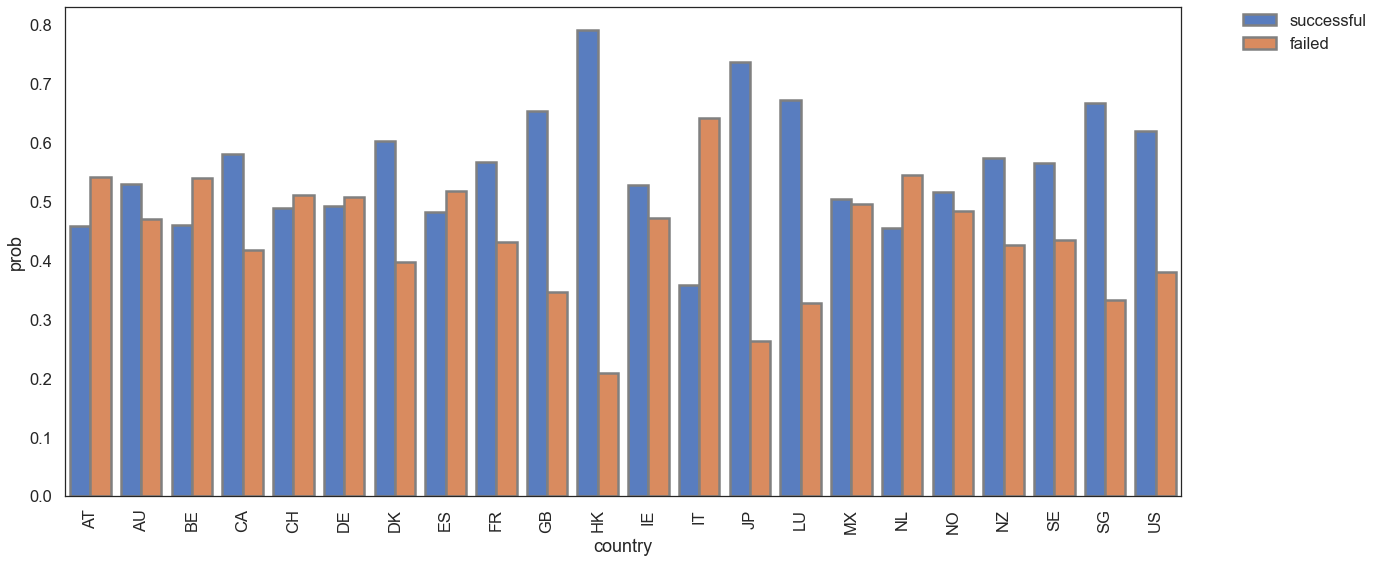

In [12]:
# succ + failed = 100% for each country, (HK;GB,SG and US are good candidates)

hue_order = ["successful","failed"]
sns.barplot(x="country", y="prob",
            data = df_plot["state"].groupby(df_plot["country"]).value_counts(normalize=True).rename("prob").reset_index(),
            hue="state",edgecolor="grey",linewidth=2.5,hue_order=hue_order)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fancybox=True);

/Users/johannes/neuefische/.venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


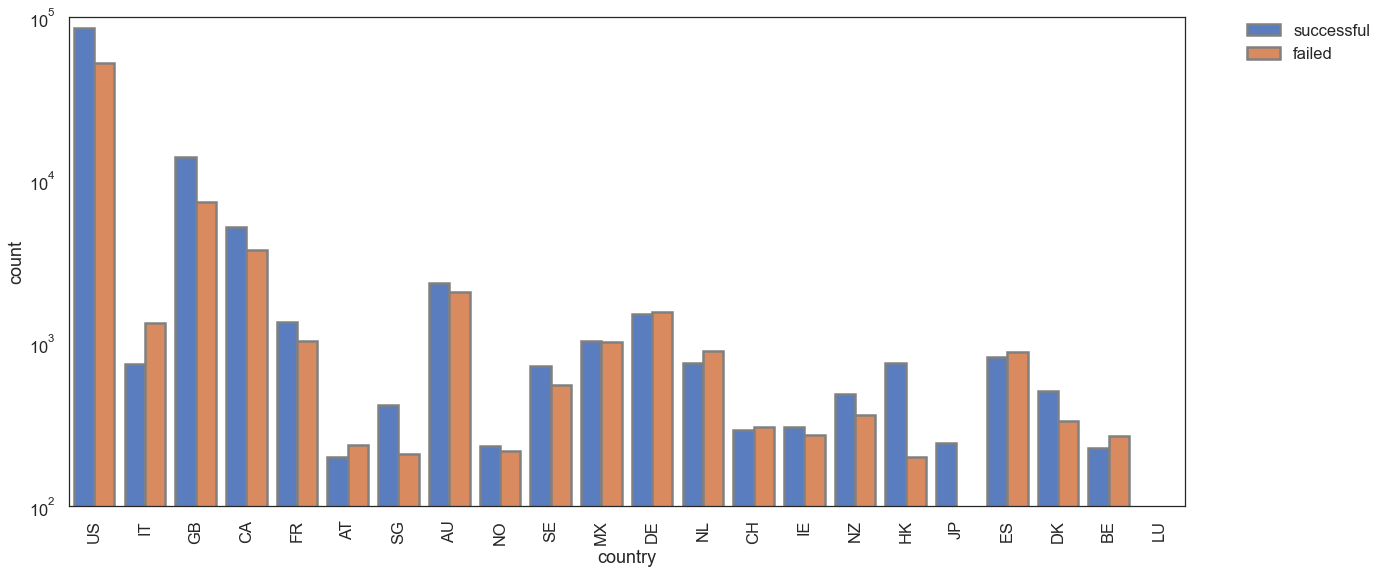

In [13]:
# absolute numbers for country

sns.countplot(df_plot.country, hue=df_plot.state,edgecolor="grey",linewidth=2.5)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fancybox=True)
plt.yscale("log")
plt.ylim(100,100000);

# Pledged

## Pledged amount - Exchange rate

In [14]:
currency_delta = df_full['converted_pledged_amount'].astype(float) - df_full['usd_pledged'] * df_full['static_usd_rate']
currency_delta.describe()

count    2.092220e+05
mean    -8.551623e+01
std      1.270609e+04
min     -1.771501e+06
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      9.330207e+05
dtype: float64

In [15]:
currency_cols = ['country', 'converted_pledged_amount', 'currency', 'currency_symbol', 'fx_rate', 'usd_pledged', 'usd_type']
df_full[currency_delta > 900][currency_cols].head(10)

,country,converted_pledged_amount,currency,currency_symbol,fx_rate,usd_pledged,usd_type
56,SG,19699,SGD,$,0.737115,19338.586040,international
83,NO,2182,NOK,kr,0.115720,2088.859902,domestic
87,SE,4340,SEK,kr,0.106663,4417.467480,domestic
94,NO,4649,NOK,kr,0.115720,4967.397210,international
113,SE,62874,SEK,kr,0.106663,63854.911570,domestic
145,MX,2107,MXN,$,0.051662,2112.931235,international
154,SE,5571,SEK,kr,0.106663,5507.784406,international
165,MX,2061,MXN,$,0.051662,2051.492031,domestic
275,CA,41677,CAD,$,0.748258,41786.790700,domestic
300,SG,12189,SGD,$,0.737115,12090.014060,domestic


## Plegded - over the years

<AxesSubplot:xlabel='launched_at_year,launched_at_month'>

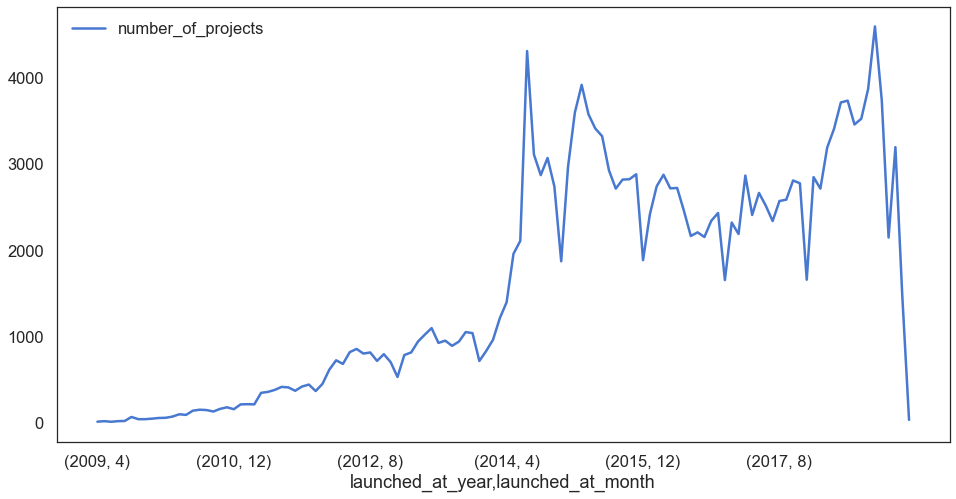

In [16]:
number_per_month = pd.pivot_table(df_plot, index=['launched_at_year', 'launched_at_month'], values='usd_pledged', aggfunc=len).rename(columns={'usd_pledged':'number_of_projects'})
number_per_month.plot(figsize=(16,8))

In [17]:
number_per_month

number_of_projects
launched_at_year launched_at_month                    
2009             4                                 6.0
                 5                                12.0
                 6                                 5.0
                 7                                12.0
                 8                                14.0
...                                                ...
2018             11                             3741.0
                 12                             2145.0
2019             1                              3195.0
                 2                              1483.0
                 3                                27.0

[120 rows x 1 columns]

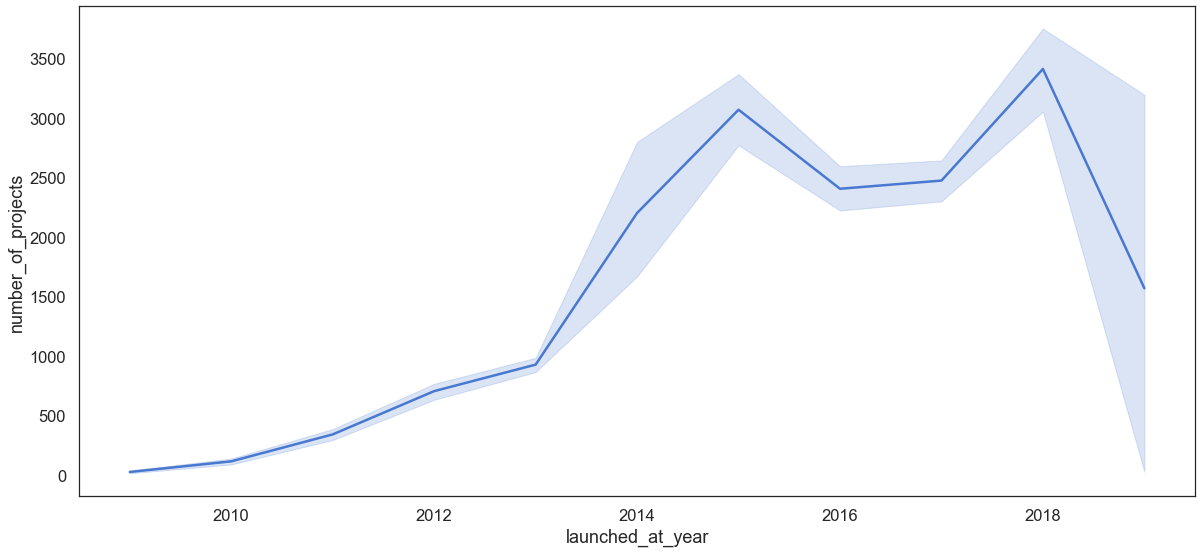

In [18]:
sns.lineplot(data=number_per_month, x = 'launched_at_year', y = 'number_of_projects')
plt.show()

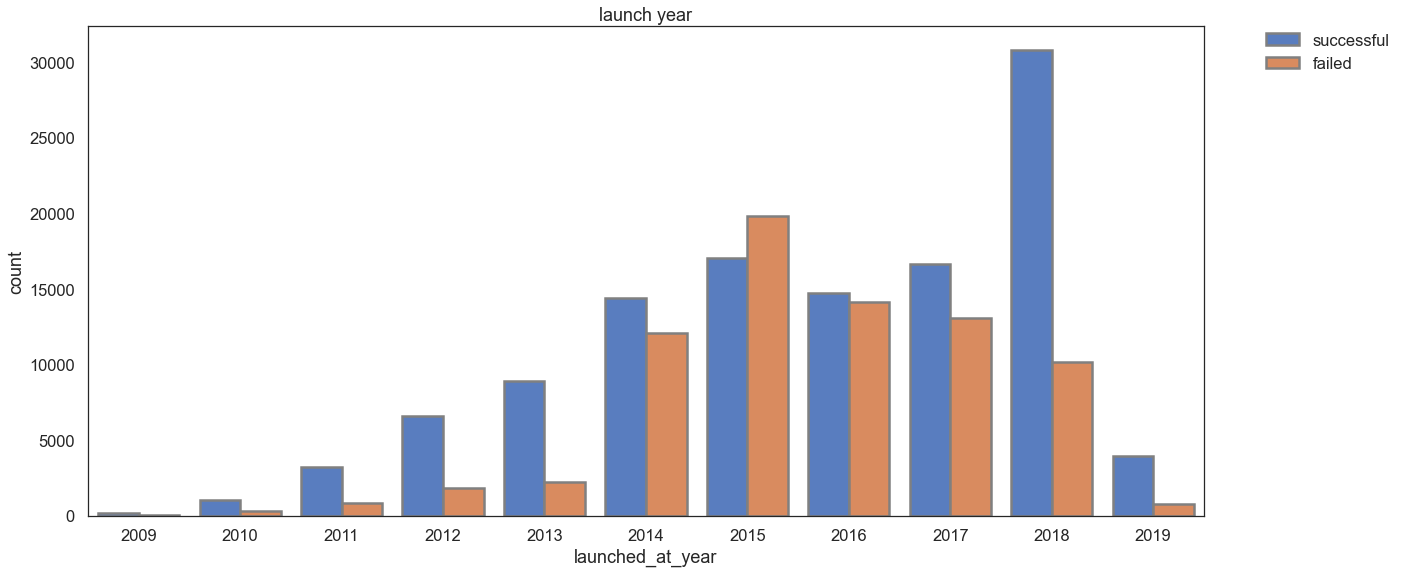

In [19]:
# how does the year relate to succes? mabye hype at first, than small downer, now its going up again

sns.countplot(data=df_plot, x = 'launched_at_year', hue = 'state',edgecolor="grey",linewidth=2.5)
plt.title("launch year")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fancybox=True);

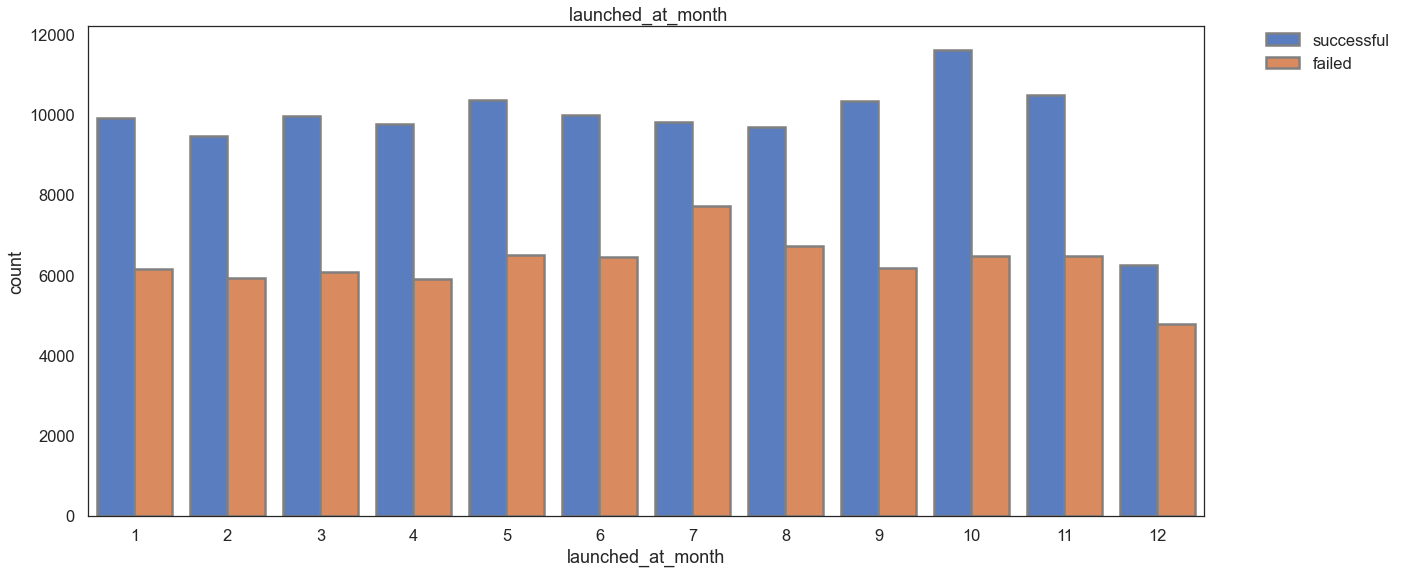

In [20]:
# launched_at_month of all years
sns.countplot(data=df_plot, x = 'launched_at_month', hue = 'state',edgecolor="grey",linewidth=2.5)
plt.title(" launched_at_month")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fancybox=True);

<AxesSubplot:xlabel='launched_at_year,launched_at_month'>

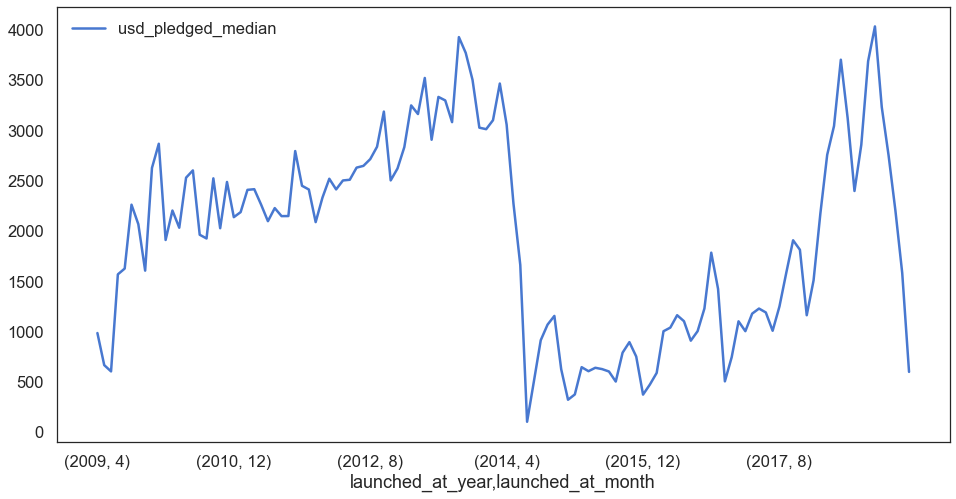

In [21]:
usd_pledged_median_per_month = pd.pivot_table(df_small, index=['launched_at_year', 'launched_at_month'], values='usd_pledged', aggfunc=pd.Series.median).rename(columns={'usd_pledged':'usd_pledged_median'})
usd_pledged_median_per_month.plot(figsize=(16,8))

<AxesSubplot:xlabel='launched_at_year,launched_at_month'>

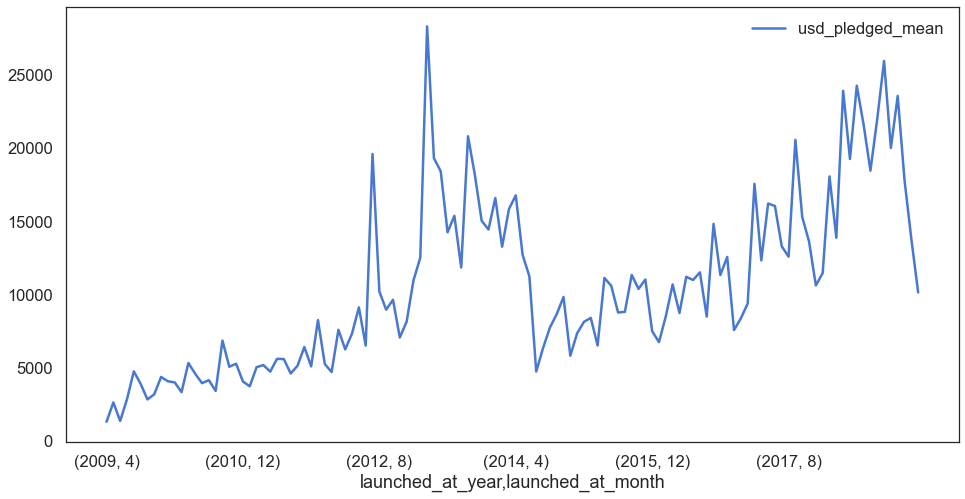

In [22]:
usd_pledged_mean_per_month = pd.pivot_table(df_full, index=['launched_at_year', 'launched_at_month'], values='usd_pledged', aggfunc=pd.Series.mean).rename(columns={'usd_pledged':'usd_pledged_mean'})
usd_pledged_mean_per_month.plot(figsize=(16,8))

In [23]:
df_small.query("state == 'failed'")['usd_pledged'].describe()

count     75199.000000
mean       1087.368352
std        5656.864120
min           0.000000
25%           1.000000
50%          55.830230
75%         440.000000
max      607628.380000
Name: usd_pledged, dtype: float64

## Pledged - Categories

In [24]:
filter_col = [col for col in df_full if col.startswith('category')]
df_full[filter_col].query('category_id == 16').head()

,category_id,category_name,category_slug,category_position,category_parent_id,category_color,category_urls.web.discover,category_parent_name
614,16,Technology,technology,14,NaN,6526716,http://www.kickstarter.com/discover/categories...,Technology
743,16,Technology,technology,14,NaN,6526716,http://www.kickstarter.com/discover/categories...,Technology
770,16,Technology,technology,14,NaN,6526716,http://www.kickstarter.com/discover/categories...,Technology
999,16,Technology,technology,14,NaN,6526716,http://www.kickstarter.com/discover/categories...,Technology
1170,16,Technology,technology,14,NaN,6526716,http://www.kickstarter.com/discover/categories...,Technology


In [25]:
usd_pledged_mean_per_category= pd.pivot_table(df_small, index=['launched_at_year', 'launched_at_month'], columns='category_parent_name', values='usd_pledged', aggfunc=pd.Series.mean).rename(columns={'usd_pledged':'usd_pledged_mean'})


In [26]:
usd_pledged_mean_per_category

category_parent_name                        Art       Comics       Crafts  \
launched_at_year launched_at_month                                          
2009             4                    35.000000          NaN          NaN   
                 5                  1011.833333          NaN          NaN   
                 6                  2083.505000          NaN          NaN   
                 7                  1781.041667          NaN          NaN   
                 8                  8149.541429          NaN          NaN   
...                                         ...          ...          ...   
2018             11                 7938.193590  8932.034879  2929.750699   
                 12                 4272.928553  6458.814655  5212.962724   
2019             1                  5010.982057  8105.322479  2681.732412   
                 2                  3332.662801  6134.463642  2003.806807   
                 3                  1232.504844  7070.505524  2719.276064   

category_parent_name                      Dance        Design       Fashion  \
launched_at_year launched_at_month                                            
2009             4                          NaN     41.000000           NaN   
                 5                          NaN    340.000000           NaN   
                 6                          NaN           NaN           NaN   
                 7                          NaN    866.060000           NaN   
                 8                          NaN     25.000000           NaN   
...                                         ...           ...           ...   
2018             11                 5042.671969  40372.456882   5392.274765   
                 12                 2583.271821  63721.065589  12048.795624   
2019             1                  2990.888173  39166.438118   3894.348043   
                 2                  4155.348228  37032.844342   5368.645332   
                 3                   942.081616  11452.870039   4074.039246   

category_parent_name                Film & Video         Food         Games  \
launched_at_year launched_at_month                                            
2009             4                           NaN          NaN   2265.000000   
                 5                  10184.500000          NaN           NaN   
                 6                    370.000000          NaN           NaN   
                 7                   9610.000000          NaN           NaN   
                 8                    323.000000          NaN           NaN   
...                                          ...          ...           ...   
2018             11                  7673.820604  9821.582228  38630.781580   
                 12                  8057.222131  9361.215649  66170.530889   
2019             1                   6447.503249  5319.677233  50145.865363   
                 2                   5155.239410  7957.967712  29021.599055   
                 3                  51264.782715  3881.130371  12932.689563   

category_parent_name                 Journalism        Music   Photography  \
launched_at_year launched_at_month                                           
2009             4                  3329.000000          NaN           NaN   
                 5                  1090.500000  6374.195000           NaN   
                 6                  1500.000000          NaN           NaN   
                 7                          NaN          NaN           NaN   
                 8                  2942.876667  2601.000000           NaN   
...                                         ...          ...           ...   
2018             11                 6021.620692  6536.294271   6436.977901   
                 12                 2193.442608  6114.297147  14806.009310   
2019             1                  3625.721702  7054.490884   4615.073037   
                 2                   916.886673  4561.927641   8444.483107   
      

/Users/johannes/neuefische/.venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


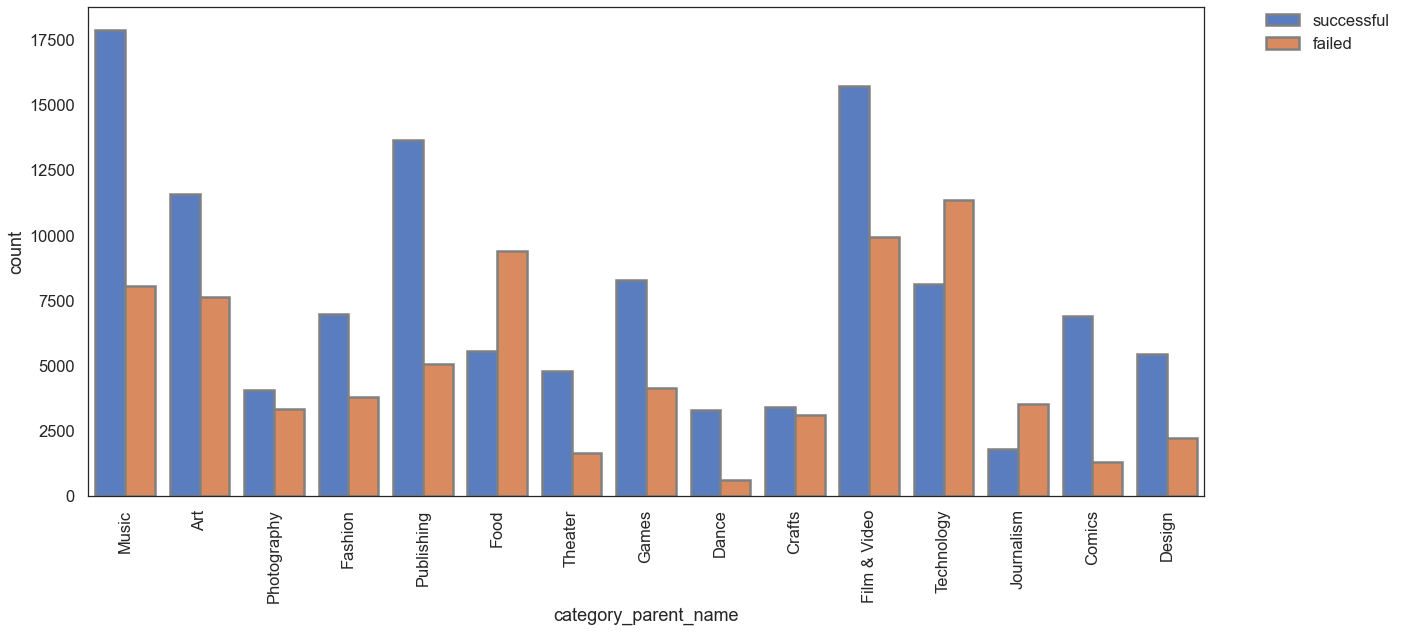

In [27]:
# absolute numbers succ and fail for each cat

sns.countplot(df_plot.category_parent_name, hue=df_plot.state,edgecolor="grey",linewidth=2.5)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fancybox=True);

<AxesSubplot:xlabel='launched_at_year,launched_at_month'>

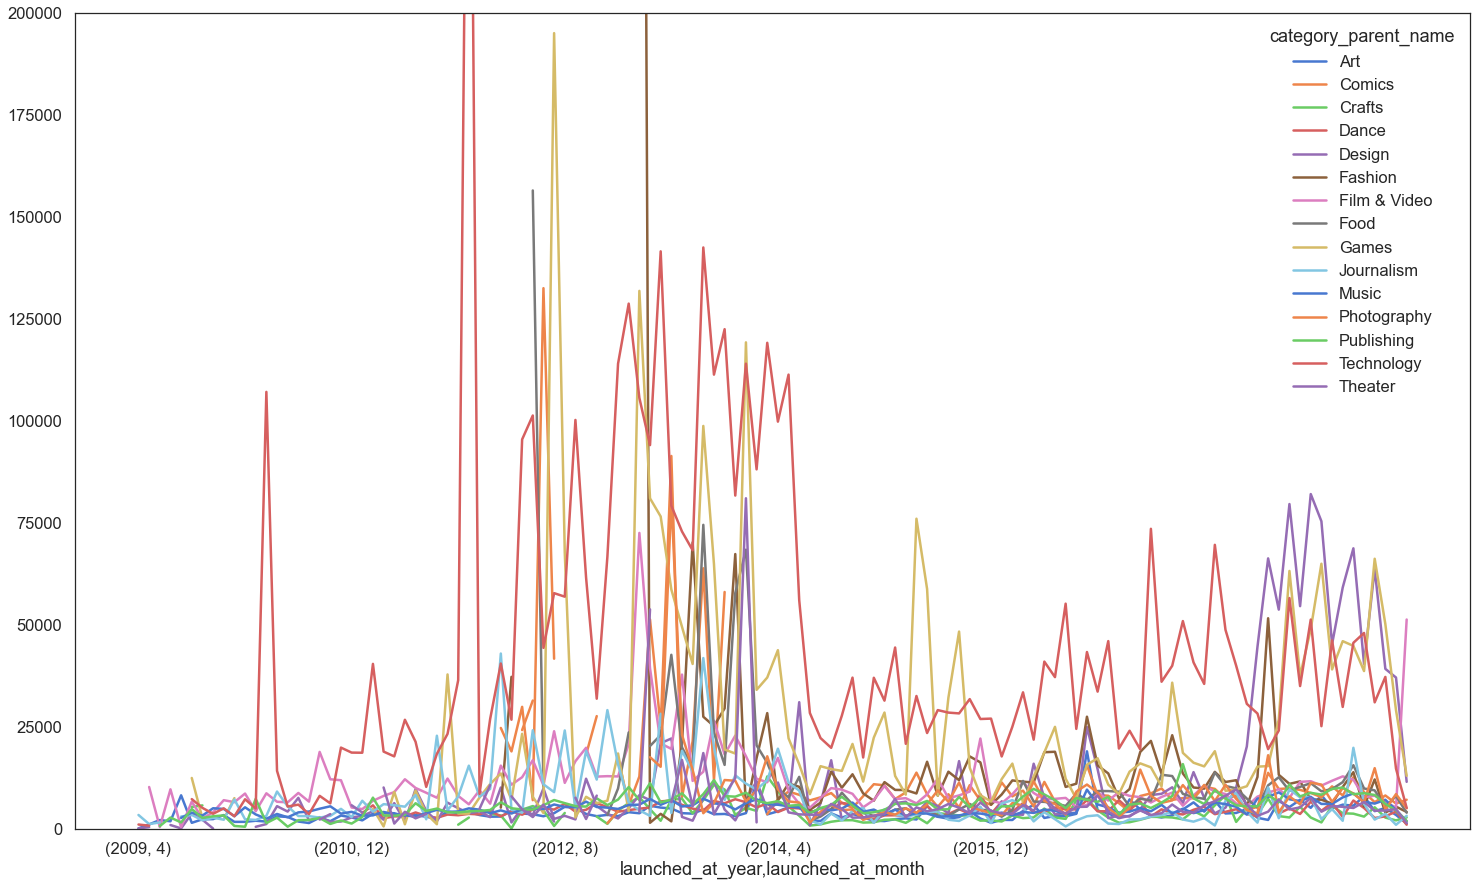

In [28]:
usd_pledged_mean_per_category.plot(figsize=(25,15), ylim=(0,200000))

/Users/johannes/neuefische/.venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


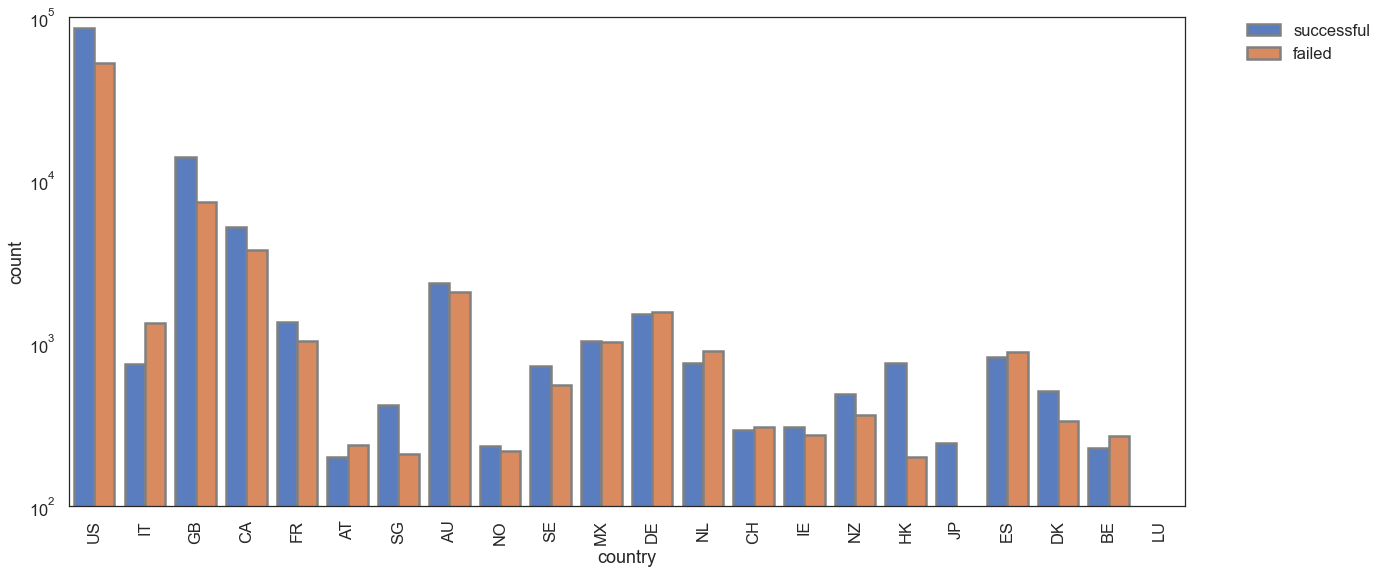

In [29]:
# absolute numbers for country

sns.countplot(df_plot.country, hue=df_plot.state,edgecolor="grey",linewidth=2.5)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fancybox=True)
plt.yscale("log")
plt.ylim(100,100000);



In [30]:
bins = [0, 5000, 10000, 15000, 20000, 25000, 30000, 50000, 100000, np.inf]
df_plot['binned_goal'] = pd.cut(df_plot['goal_usd'], bins=bins)

/Users/johannes/neuefische/.venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


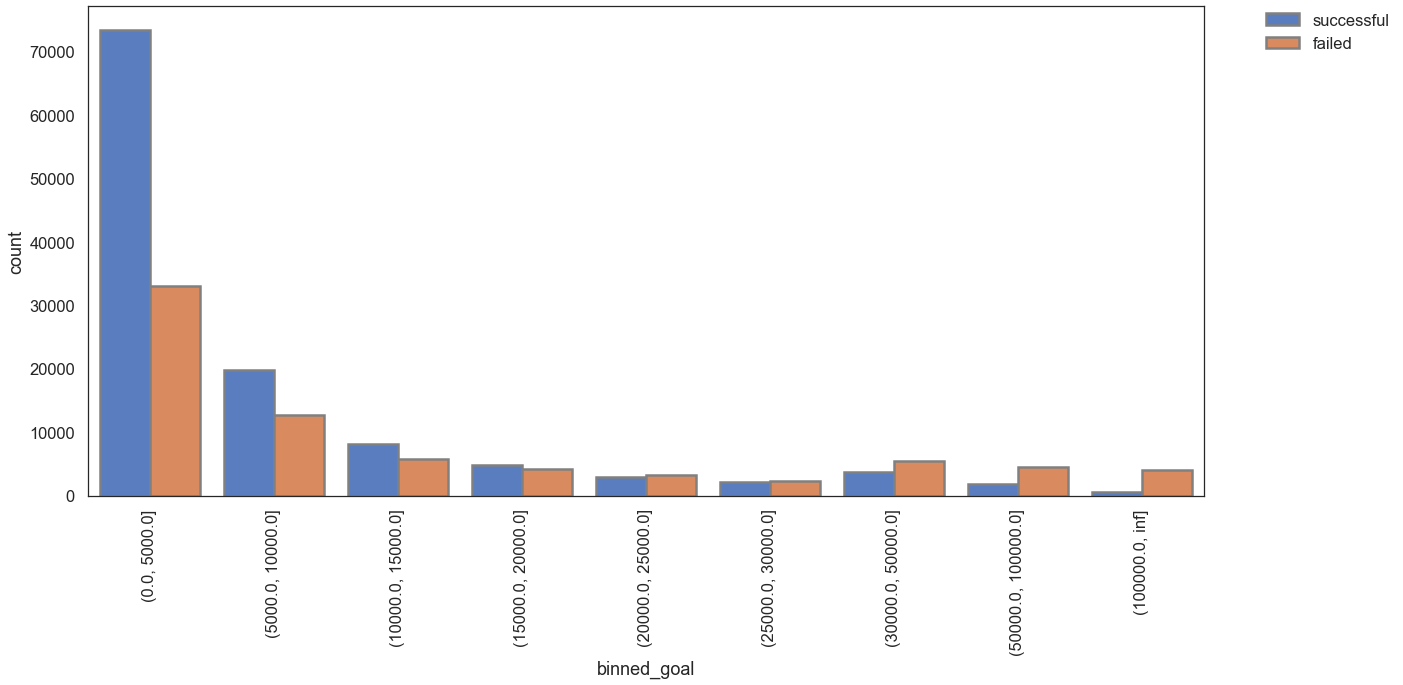

In [31]:
sns.countplot(df_plot.binned_goal, hue=df_plot.state,edgecolor="grey",linewidth=2.5)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fancybox=True);

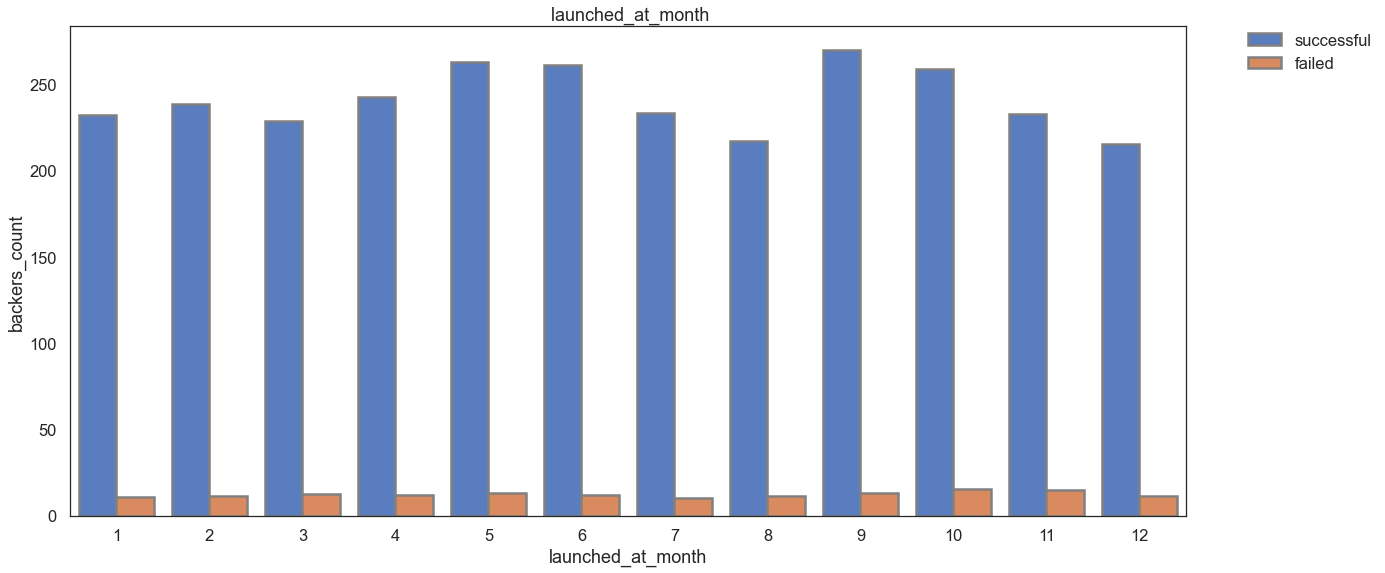

In [32]:
# 
sns.barplot(data=df_plot, x = 'launched_at_month',y= 'backers_count', hue = 'state',edgecolor="grey",linewidth=2.5, ci=None)
plt.title(" launched_at_month")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fancybox=True);

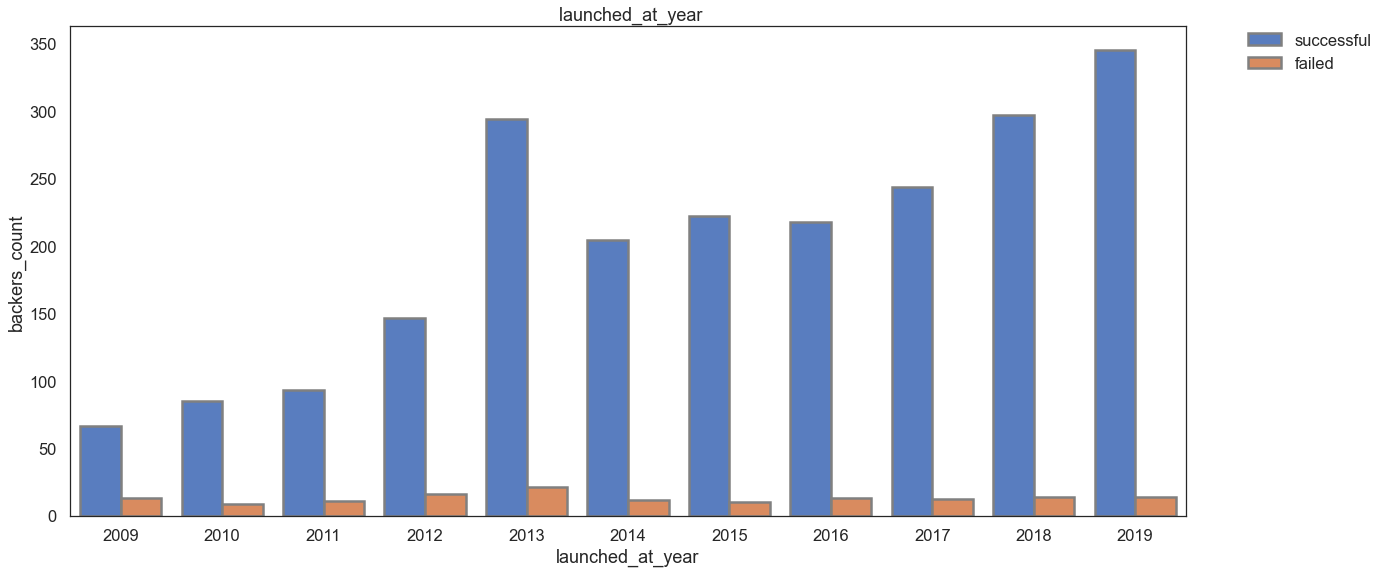

In [33]:
# 
sns.barplot(data=df_plot, x = 'launched_at_year',y= 'backers_count', hue = 'state',edgecolor="grey",linewidth=2.5, ci=None)
plt.title(" launched_at_year")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fancybox=True);

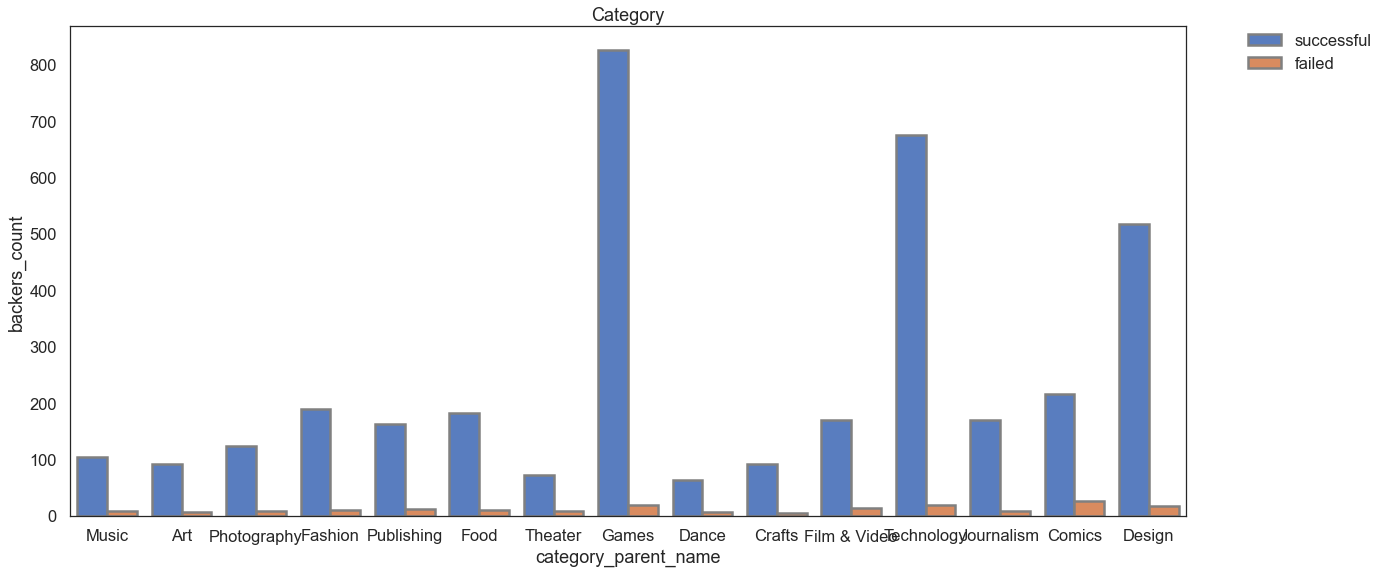

In [34]:
# 
sns.barplot(data=df_plot, x = 'category_parent_name',y= 'backers_count', hue = 'state',edgecolor="grey",linewidth=2.5, ci=None)
plt.title("Category")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fancybox=True);

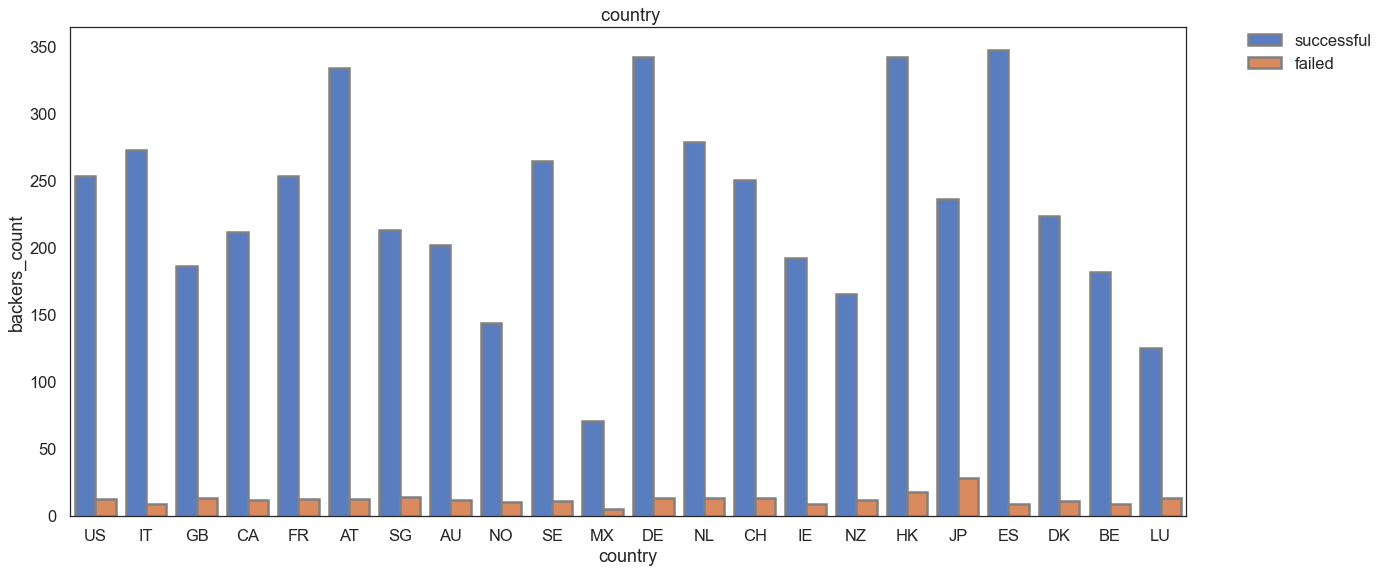

In [35]:
# 
sns.barplot(data=df_plot, x = 'country',y= 'backers_count', hue = 'state',edgecolor="grey",linewidth=2.5, ci=None)
plt.title(" country")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fancybox=True);

In [63]:
df_plot = df_plot[df_plot['blurb'].notna()]

In [64]:
df_plot[['blurb']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192662 entries, 0 to 192663
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   blurb   192662 non-null  object
dtypes: object(1)
memory usage: 2.9+ MB


In [68]:
# Not possible with Nan values?
# Calculates length of Blurb entry as has has no Blurb occurs only 2 times
# df_eda['blurbLength'] = df_eda.blurb.str.len()
df_plot['blurb_len'] = [elm.split(" ") for elm in df_plot.blurb]
df_plot['blurb_len'] = [len(i) for i in df_plot['blurb_len']]
# blurb_len = [len(elm.split(" ")) for elm in df_plot.blurb]

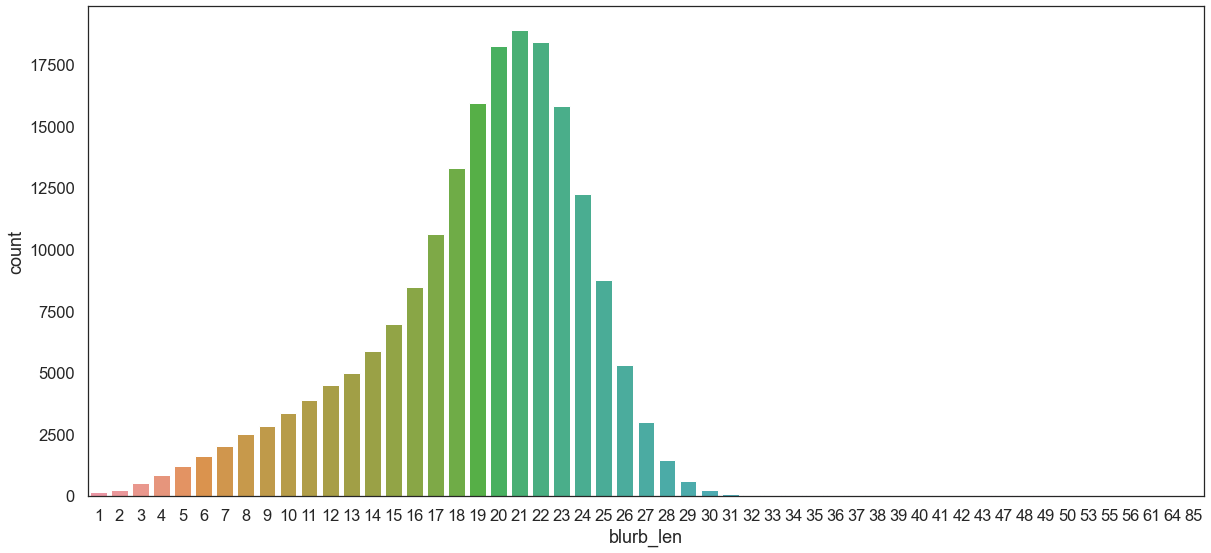

In [70]:
ax = sns.countplot(x="blurb_len", data=df_plot)

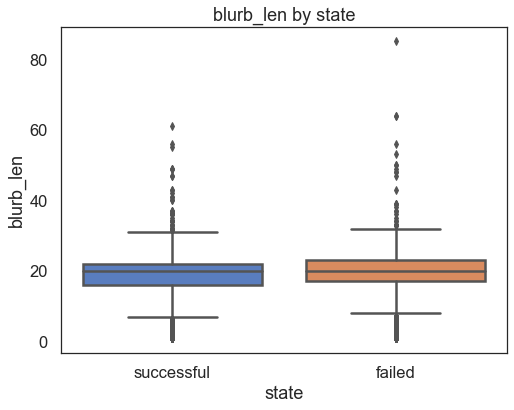

In [71]:
#Boxplot of blurb_length by success
plt.figure(figsize=(8,6))
sns.boxplot(x='state', y='blurb_len', data=df_plot)
plt.title('blurb_len by state');

/Users/johannes/neuefische/.venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


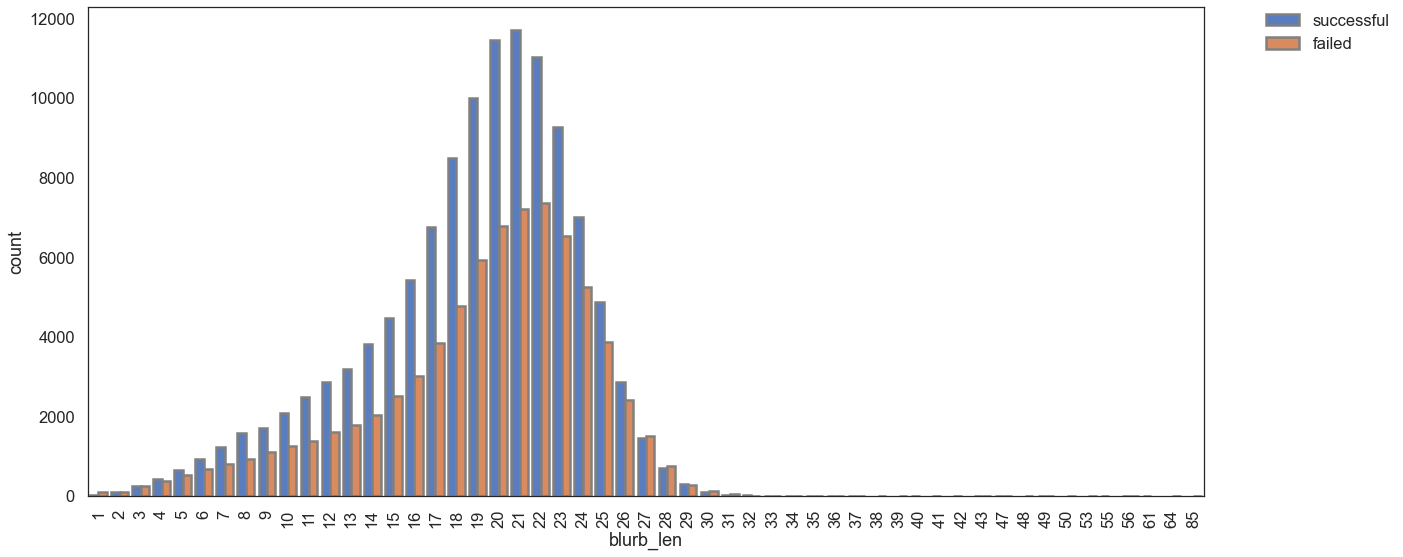

In [72]:
# influence of blurb length, longer blurb seem to be better till 21 words
sns.countplot(df_plot.blurb_len, hue=df_plot.state,edgecolor="grey",linewidth=2.5)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fancybox=True);

/Users/johannes/neuefische/.venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


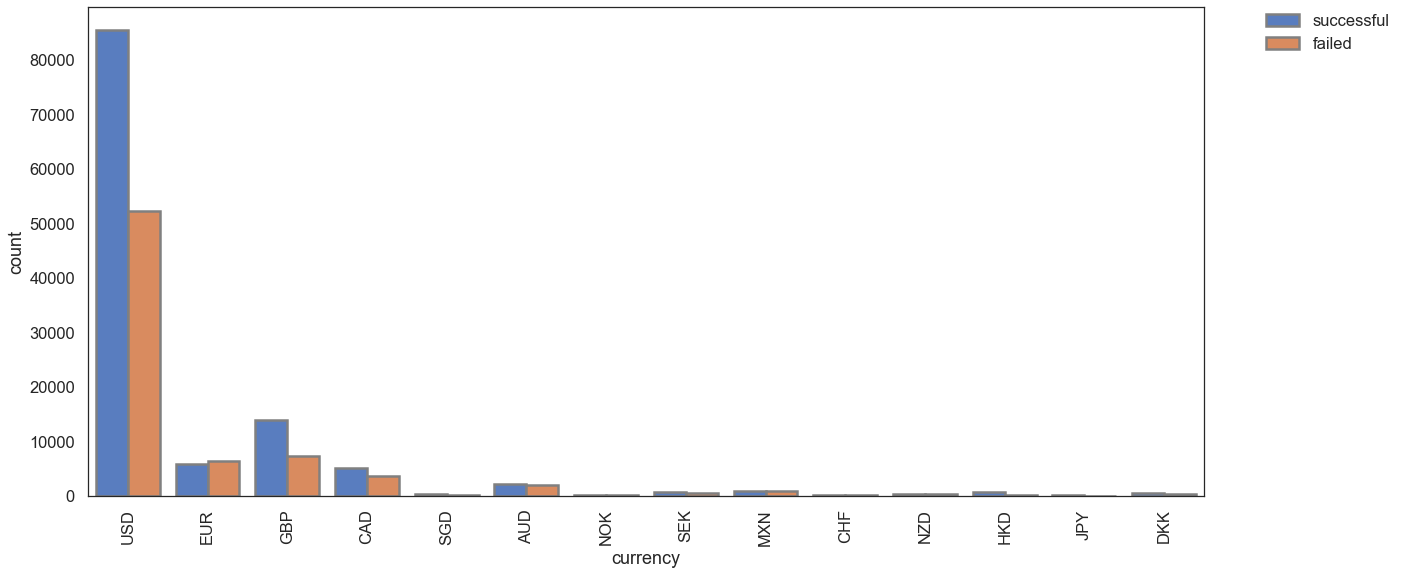

In [43]:
# influence of blurb length, longer blurb seem to be better till 21 words
sns.countplot(df_plot.currency, hue=df_plot.state,edgecolor="grey",linewidth=2.5)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fancybox=True);

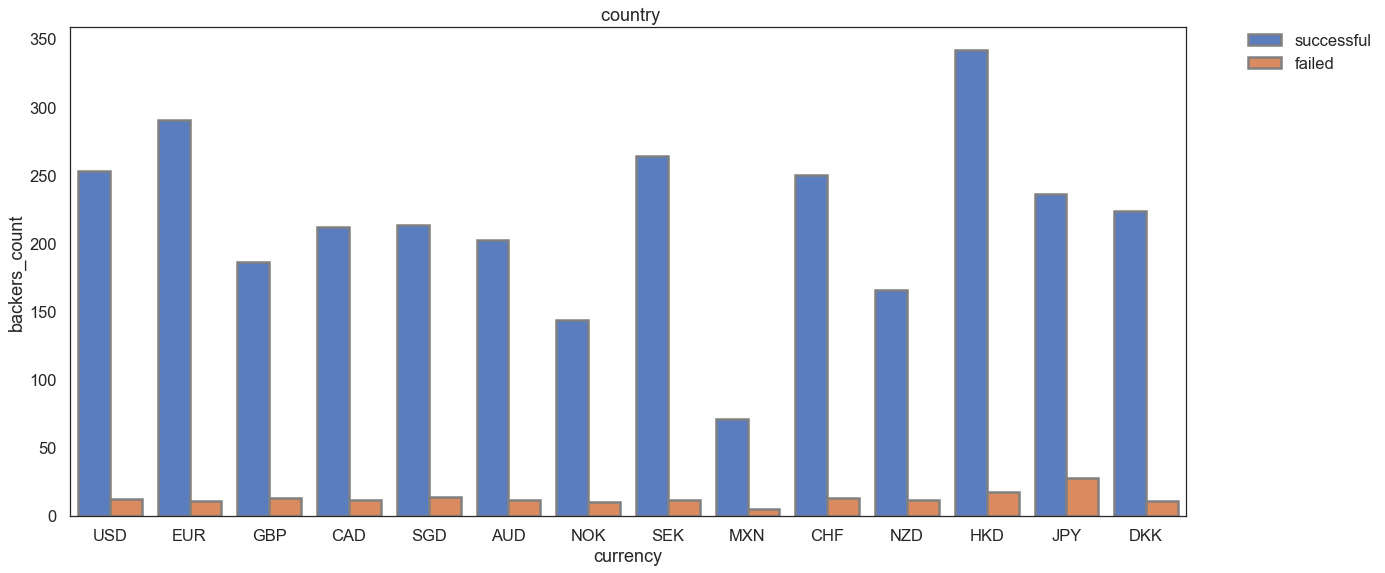

In [44]:
# 
sns.barplot(data=df_plot, x = 'currency',y= 'backers_count', hue = 'state',edgecolor="grey",linewidth=2.5, ci=None)
plt.title(" country")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fancybox=True);

No handles with labels found to put in legend.


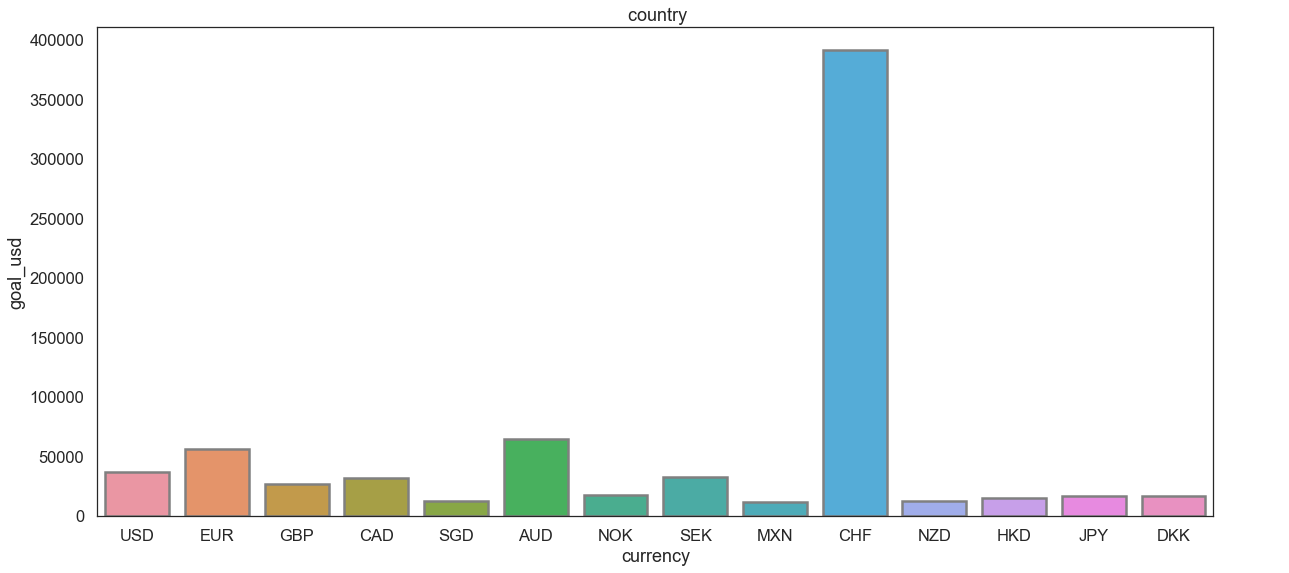

In [45]:
# 
sns.barplot(data=df_plot, x = 'currency',y= 'goal_usd',edgecolor="grey",linewidth=2.5, ci=None)
plt.title(" country")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fancybox=True);

/Users/johannes/neuefische/.venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


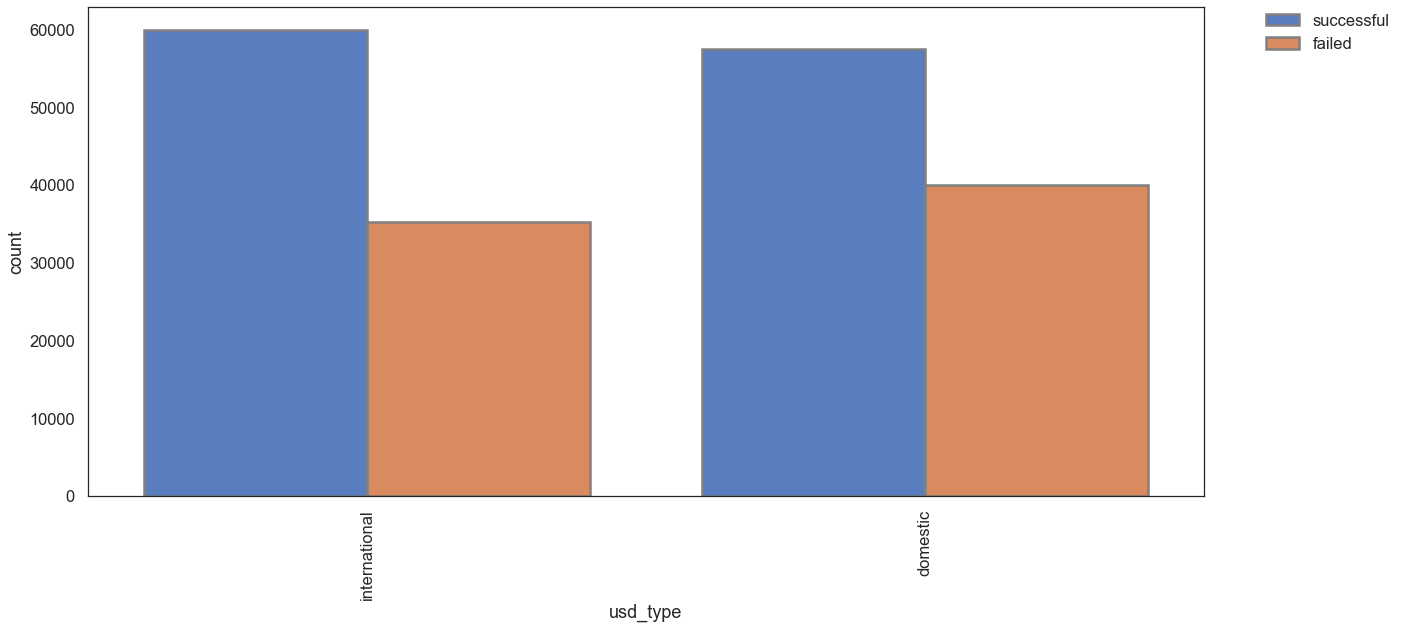

In [46]:
# influence of blurb length, longer blurb seem to be better till 21 words
sns.countplot(df_plot.usd_type, hue=df_plot.state,edgecolor="grey",linewidth=2.5)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fancybox=True);

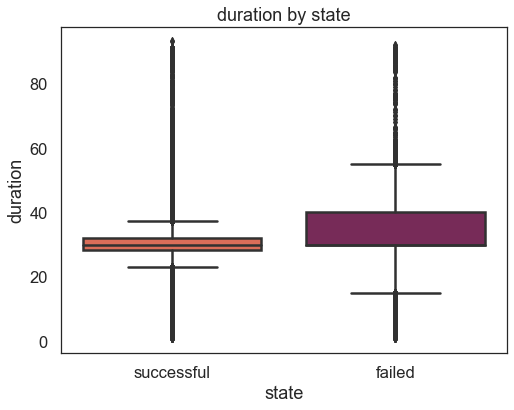

In [47]:
#Boxplot of duration in days by state
plt.figure(figsize=(8,6))
sns.boxplot(x='state', y='duration', data=df_plot, palette='rocket_r')
plt.title('duration by state');

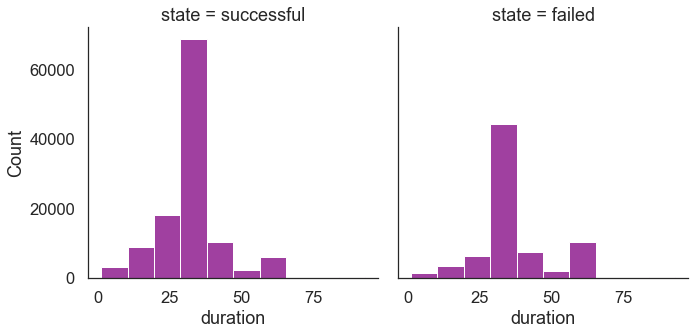

In [48]:
sns.displot(df_plot, x="duration", col="state", multiple="dodge", color="purple", bins=10);

<AxesSubplot:xlabel='country', ylabel='Count'>

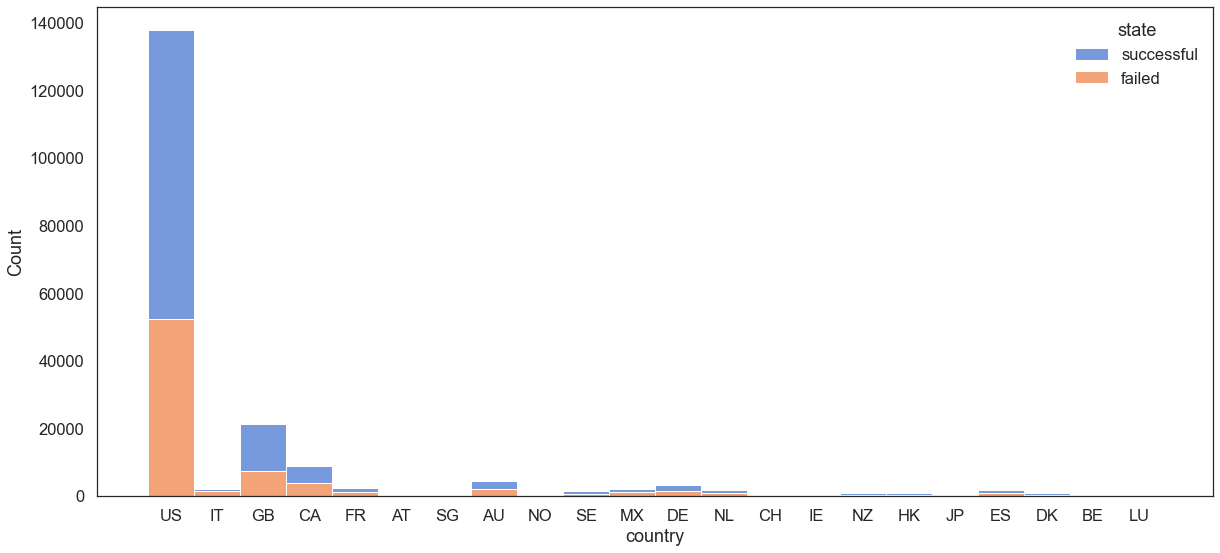

In [49]:
sns.histplot(data=df_plot, x="country", hue="state", multiple="stack")

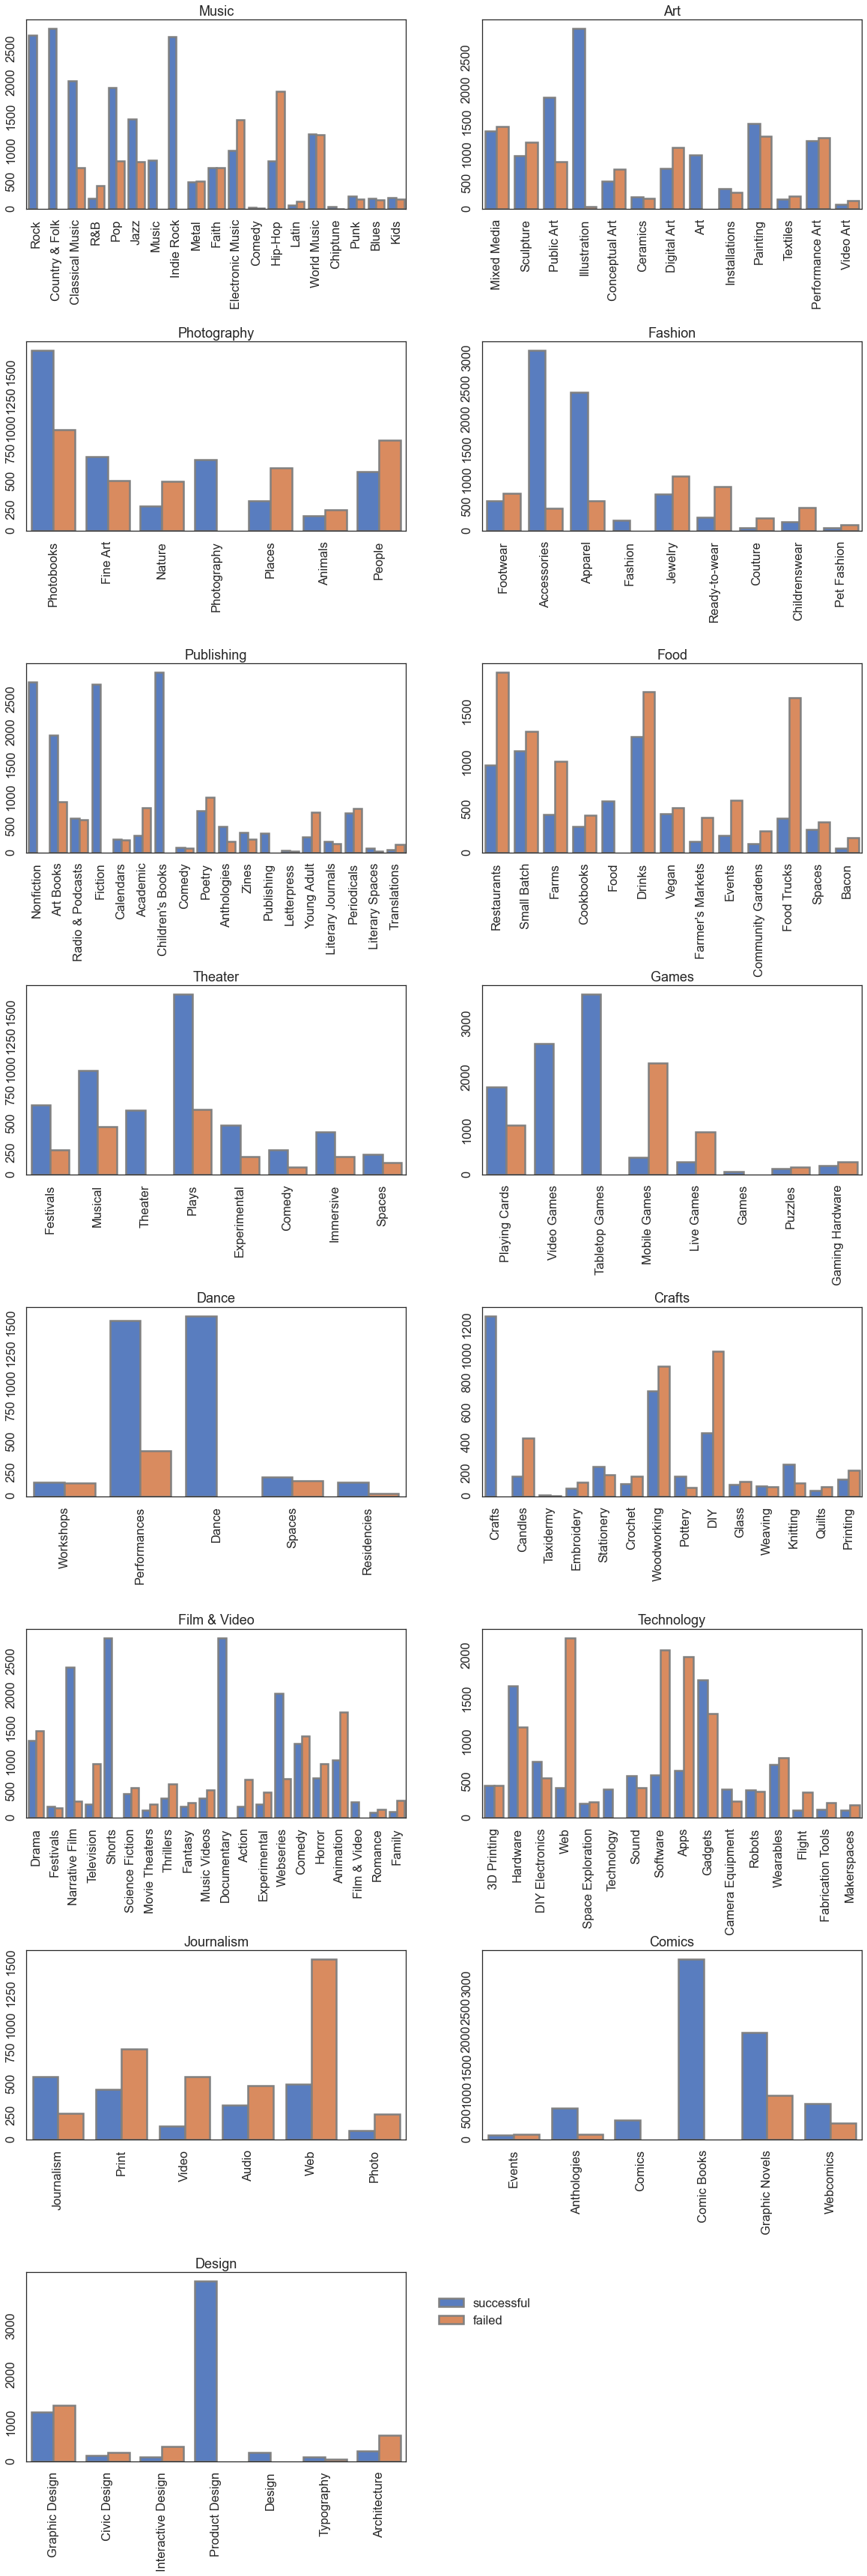

In [50]:
#for loop to print eacht category with its subcategory, to see if some categories have specific failure points
#(looking at apps, software and web in technology!)

fig, ax = plt.subplots(ncols=2, nrows=8,figsize=(20,60),gridspec_kw={'hspace': 0.7})

for idx, elm in enumerate(df_plot.category_parent_name.unique()):
    sns.countplot(data=df_plot[df_plot["category_parent_name"] == elm],x="category_name", hue=df_plot.state,ax=ax[int(idx/2)][idx%2],edgecolor="grey",linewidth=2.5)
    ax[int(idx/2)][idx%2].tick_params(rotation=90)
    ax[int(idx/2)][idx%2].set_title(elm)
    ax[int(idx/2)][idx%2].set_ylabel("")
    ax[int(idx/2)][idx%2].set_xlabel("")
    ax[int(idx/2)][idx%2].legend().set_visible(False)
handles, labels = ax[1][0].get_legend_handles_labels()
ax[7][1].set_visible(False)
fig.legend(handles, labels,loc=(0.5,0.095));



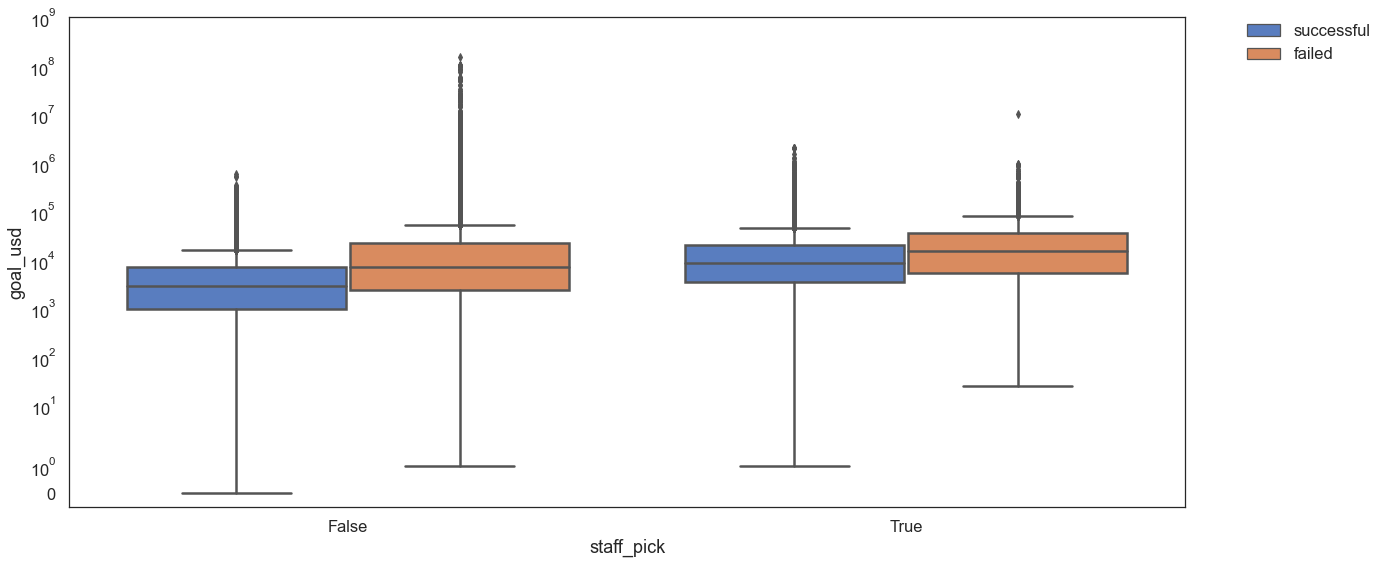

In [51]:
sns.boxplot(data=df_plot, y="goal_usd",x="staff_pick",hue="state")
plt.xticks(rotation=0)
plt.yscale("symlog")
plt.ylim(-0.5,10e8)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0, fancybox=True);

In [52]:
# Calculates length of name
df_plot['name_len'] = [elm.split(" ") for elm in df_plot.name]
df_plot['name_len'] = [len(i) for i in df_plot['name_len']]

/Users/johannes/neuefische/.venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


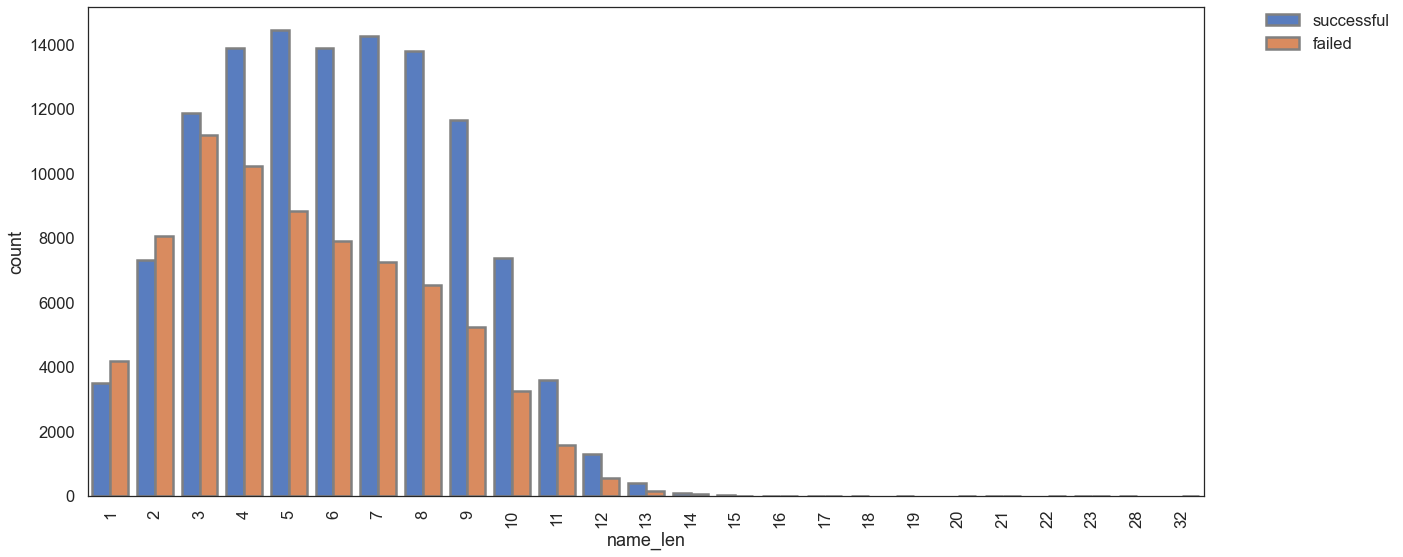

In [53]:
# influence of blurb length, longer blurb seem to be better till 21 words
sns.countplot(df_plot.name_len, hue=df_plot.state,edgecolor="grey",linewidth=2.5)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fancybox=True);

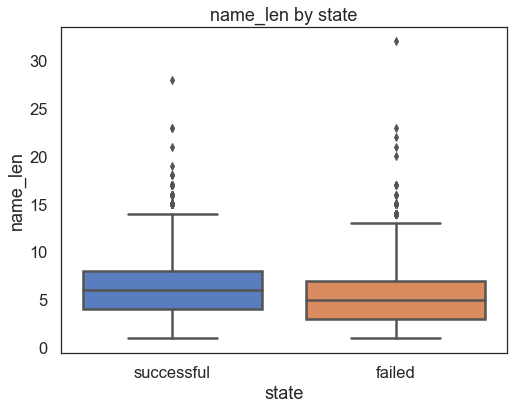

In [54]:
#Boxplot of blurb_length by success
plt.figure(figsize=(8,6))
sns.boxplot(x='state', y='name_len', data=df_plot)
plt.title('name_len by state');